In [125]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt

## U.S. News' Top MBA Ranking

A career in business starts with finding the MBA program that fits your needs. 

In [126]:
## Web scraping the list of top 100 B-schools from Wikipedia page since U.S. News forbids users from scraping data on their website.

top_100_url = 'https://en.wikipedia.org/wiki/List_of_United_States_graduate_business_school_rankings'
top_100_page = urllib.request.urlopen(top_100_url)
top_100_soup = BeautifulSoup(top_100_page, "lxml")

In [127]:
## Looking for the table with the class 'wikitable' that we need to extract

top_100_tables=top_100_soup.find_all("table")[1]

In [128]:
## Extracting the columns and their relevant information

rowValList = []

for i in range(len(top_100_tables.find_all('td'))):
    rowVal = top_100_tables.find_all('td')[i].get_text()
    rowValList.append(rowVal)
    
rowValList = [w.replace('\n', '') for w in rowValList]

In [129]:
## Selecting the B-schools and its parent universities as well as the locations

Business_School = []
for i in range(0, len(rowValList), 12):
    Business_School.append(rowValList[i])
    
University = []
for i in range(1, len(rowValList), 12):
    University.append(rowValList[i])
    
Location = []
for i in range(2, len(rowValList), 12):
    Location.append(rowValList[i])
    
USN_Ranking = []
for i in range(3, len(rowValList), 12):
    USN_Ranking.append(rowValList[i])

In [130]:
## Passing along the variables to a new dataframe
top_100_df = pd.DataFrame()
top_100_df['Business School'] = Business_School
top_100_df['University'] = University
top_100_df['Location'] = Location
top_100_df['USNews'] = USN_Ranking

## Removing the B-schools ranked '99-131' and 'NR' for not ranked
top_100_df = top_100_df[(top_100_df.USNews != '99-131') & (top_100_df.USNews != 'NR')]

## Changing column's data type in order to sort the table by index
top_100_df['Ranking'] = top_100_df['USNews'].astype({'USNews':'int64'})
top_100_df.drop('USNews', axis=1, inplace=True)
top_100_df.set_index('Ranking', inplace=True)
top_100_df.sort_index(inplace=True)

## Creating 'City' and 'State' columns
top_100_df[['State','City']]= top_100_df['Location'].str.split(",", expand = True) 
top_100_df.drop('Location', axis=1, inplace=True)

In [131]:
## Top 10 MBA programs

top_100_df.head(10)

,Business School,University,State,City
Ranking,,,,
1,The Wharton School,University of Pennsylvania,Pennsylvania,Philadelphia
2,Stanford Graduate School of Business,Stanford University,California,Stanford
3,Harvard Business School,Harvard University,Massachusetts,Boston
3,MIT Sloan School of Management,Massachusetts Institute of Technology,Massachusetts,Cambridge
3,Booth School of Business,University of Chicago,Illinois,Chicago
6,Kellogg School of Management,Northwestern University,Illinois,Evanston
6,Columbia Business School,Columbia University,New York,New York City
6,Haas School of Business,"University of California, Berkeley",California,Berkeley
9,Yale School of Management,Yale University,Connecticut,New Haven


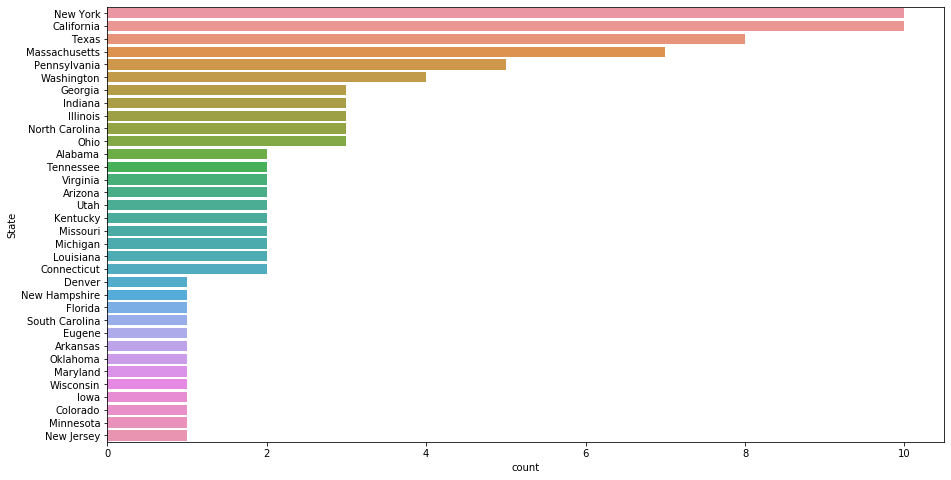

In [132]:
## Top states with the most ranked B-schools

plt.figure(figsize=(15,8))

top_state = sns.countplot(y='State', data=top_100_df, order = top_100_df['State'].value_counts().index)


## Top 50 B-schools with details

In [142]:
top_50_url = 'https://gmatclub.com/forum/all-school-stats-in-one-place-166143.html'
top_50_page = urllib.request.urlopen(top_50_url)
top_50_soup = BeautifulSoup(top_50_page, "lxml")

In [143]:
top_50_table=top_50_soup.find('table', class_='stoker')

In [144]:
rowValList1 = []

for i in range(len(top_50_table.find_all('td'))):
    rowVal1 = top_50_table.find_all('td')[i].get_text()
    rowValList1.append(rowVal1)
    
rowValList1.remove('Top US Business Schools: Class Profiles and Comparison')

In [152]:
USNewsRank = []
for i in range(0, len(rowValList1), 10):
    USNewsRank.append(rowValList1[i])
    
School = []
for i in range(1, len(rowValList1), 10):
    School.append(rowValList1[i])
    
ClassSize = []
for i in range(2, len(rowValList1), 10):
    ClassSize.append(rowValList1[i])
    
AcceptanceRate = []
for i in range(3, len(rowValList1), 10):
    AcceptanceRate.append(rowValList1[i])

AvgGMAT = []
for i in range(4, len(rowValList1), 10):
    AvgGMAT.append(rowValList1[i])

AvgGRE = []
for i in range(5, len(rowValList1), 10):
    AvgGRE.append(rowValList1[i])

AvgAge = []
for i in range(6, len(rowValList1), 10):
    AvgAge.append(rowValList1[i])
    
AvgGPA = []
for i in range(7, len(rowValList1), 10):
    AvgGPA.append(rowValList1[i])
    
Employment3 = []
for i in range(8, len(rowValList1), 10):
    Employment3.append(rowValList1[i])
    
AvgSalary = []
for i in range(9, len(rowValList1), 10):
    AvgSalary.append(rowValList1[i])

In [153]:
top_50_df = pd.DataFrame()

top_50_df['School'] = School
top_50_df['US News Rank'] = USNewsRank
top_50_df['Class Size'] = ClassSize
top_50_df['Acceptance Rate'] = AcceptanceRate
top_50_df['Avg GMAT'] = AvgGMAT
top_50_df['Avg GRE'] = AvgGRE
top_50_df['AvgAge'] = AvgAge
top_50_df['Avg GPA'] = AvgGPA
top_50_df['Employed @ 3 Months'] = Employment3

top_50_df.drop(top_50_df.index[0], inplace=True)
top_50_df.reset_index(drop=True, inplace=True)
top_50_df.set_index('US News Rank', inplace=True)

They’re called the M7 business schools, the most elite and prestigious list of full-time MBA experiences in the world. Here are the Magnificent 7 MBA programs:

In [154]:
top_50_df.head(7)

,School,Class Size,Acceptance Rate,Avg GMAT,Avg GRE,AvgAge,Avg GPA,Employed @ 3 Months
US News Rank,,,,,,,,
1,Wharton,862,21%,732,N/A,28,3.6,95%
2,Stanford,419,6%,732,"165V, 165Q",N/A,3.73,88%
3,Harvard,930,10%,731,"165V, 163Q",27,3.71,89%
3,MIT Sloan,409,13%,728,N/A,28,3.57,94%
3,Booth,591,23%,731,N/A,28,3.58,88%
6,Columbia,552,15%,736,N/A,28,3.6,90%
6,Kellogg,478,22%,732,N/A,28,3.6,92%


In [155]:
## Changing data types for 'Class Size' and 'Acceptance Rate' only since other variables remain relatively the same.

# Class Size
top_50_df['Class Size'] = top_50_df['Class Size'].astype({'Class Size':'int64'})

# Acceptance Rate
top_50_df['Acceptance Rate'] = top_50_df['Acceptance Rate'].str.replace('%','')
top_50_df['Acceptance Rate'] = top_50_df['Acceptance Rate'].astype({'Acceptance Rate':'int64'})


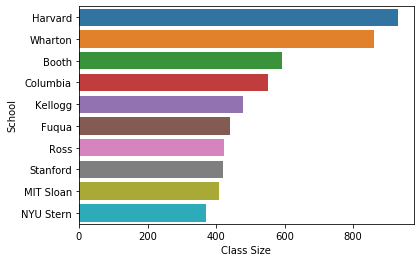

In [156]:
top_10_size = top_50_df[['School', 'Class Size']].sort_values('Class Size', ascending=False).head(10)
sns.barplot(x='Class Size', y='School', data=top_10_size)

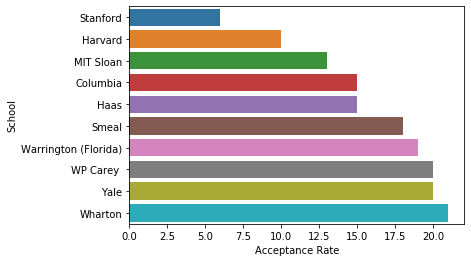

In [157]:
top_10_rate = top_50_df[['School', 'Acceptance Rate']].sort_values('Acceptance Rate').head(10)
sns.barplot(x='Acceptance Rate', y='School', data=top_10_rate)